In [150]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Generate some random 2D data in 2 classes

seed= 2972


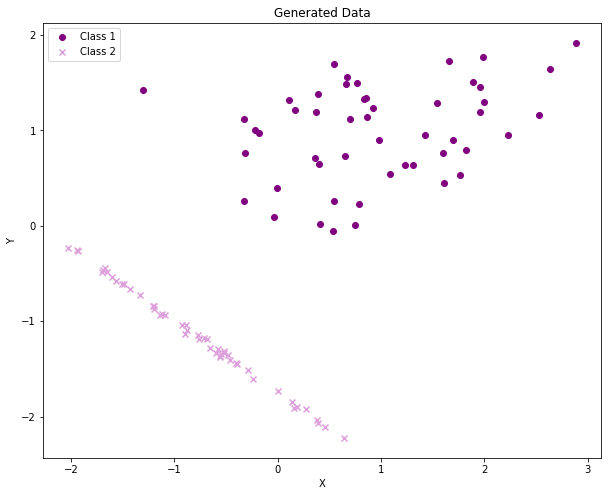

In [224]:
rcParams['figure.figsize'] = 10, 8
separable = False
while not separable:
    seed=np.random.randint(0,10000)
    samples = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, flip_y=0, random_state=seed)
    class1_points = samples[0][samples[1] == 0]
    class2_points = samples[0][samples[1] == 1]
    
    separable = any([class1_points[:, k].max() < class2_points[:, k].min() or class1_points[:, k].min() > class2_points[:, k].max() for k in range(2)])


print('seed=',seed)
plt.scatter(class1_points[:, 0], class1_points[:, 1],  color ='purple', label = 'Class 1', marker = 'o')
plt.scatter(class2_points[:, 0], class2_points[:, 1], color = 'plum', label = 'Class 2', marker = 'x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Generated Data')

plt.show()

## Add all 2 classes to make our dataset

In [225]:
 all_data = np.vstack((class1_points, class2_points))
 X = all_data
 y = np.hstack((np.zeros(len(class1_points)), np.ones(len(class2_points))))


## Add bias and split data to train and test

In [226]:


# # Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Add bias term
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [227]:
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)


Shape of X_train:  (80, 3)
Shape of y_train:  (80,)
Shape of X_test:  (20, 3)
Shape of y_test:  (20,)


## Logistic Regression

In [228]:
# Plot decision boundary
def plot_decision_boundary(X, y, theta, iteration):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2],color = 'purple', marker='o', label='Class 1', )
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color = 'plum', marker='x', label='Class 2', )
    plt.xlabel('X1')
    plt.ylabel('X2')
#     plt.xlim(np.min(X[:,1])-1, np.max(X[:,1])+1)
    plt.ylim(np.min(X[:,2])-0.2, np.max(X[:,2])+0.3)
    plt.title('Decision Boundary - Iteration {}'.format(iteration))
    x_values = np.array([np.min(X[:,1]), np.max(X[:,1])])
    y_values = -(theta[0] + theta[1] * x_values) / theta[2]
    plt.plot(x_values, y_values, label='Decision Boundary', color='darkblue')
    plt.legend()
    plt.show()


In [229]:
# Initialize weight
theta = np.zeros(X_train.shape[1])
theta=np.random.randn(X_train.shape[1])
print(theta)

[-0.59796272 -0.30604212 -0.9835869 ]


In [230]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [231]:
# Logistic regression with gradient descent
def logistic_regression(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        
        # Plot decision boundary
        if i % 100 == 0:
            plot_decision_boundary(X, y, theta, i)

    return theta


In [232]:
# Predict function
def predict(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    # Threshold the predicted values to 0 or 1
    return (h >= 0.5).astype(int)


## Train our model

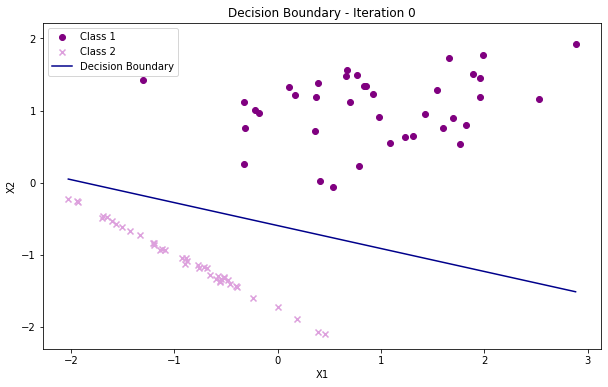

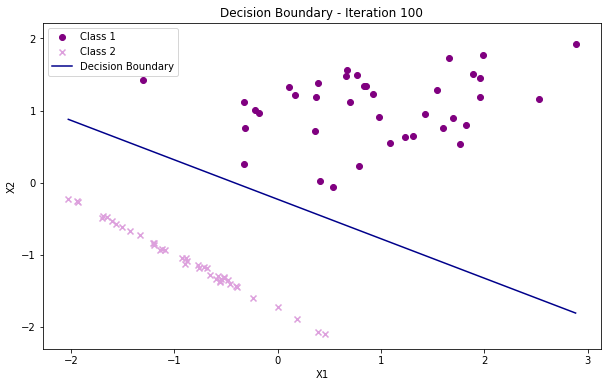

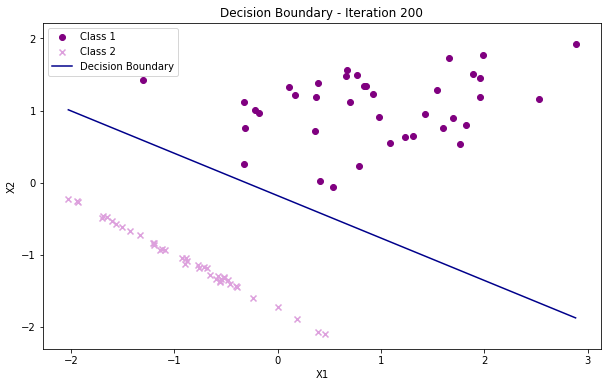

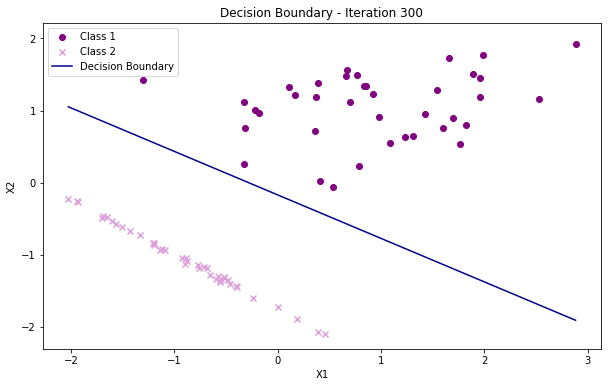

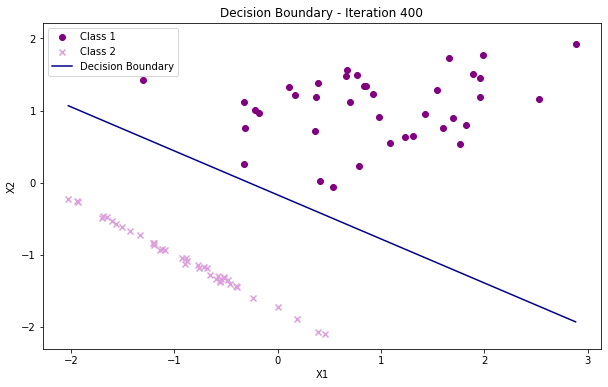

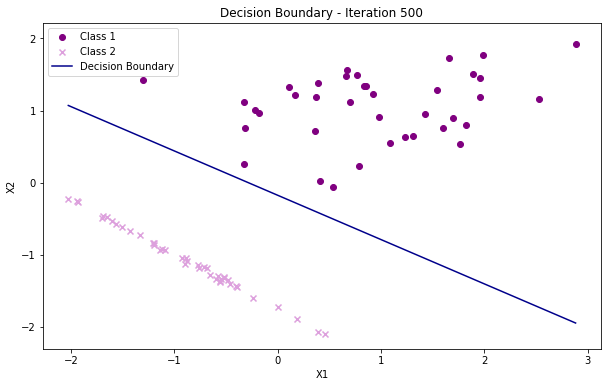

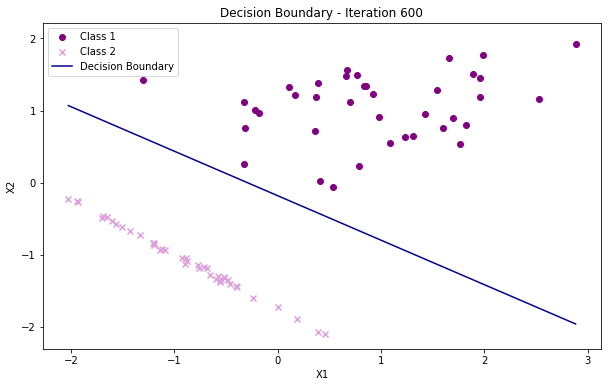

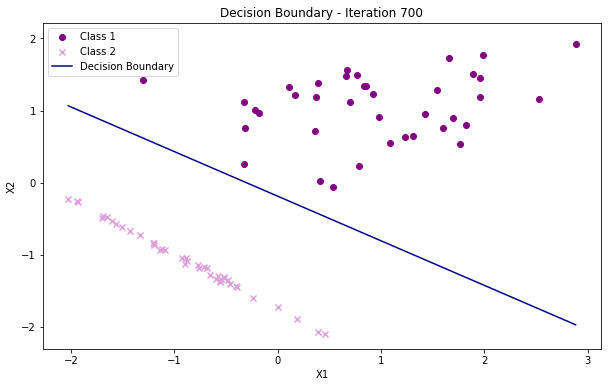

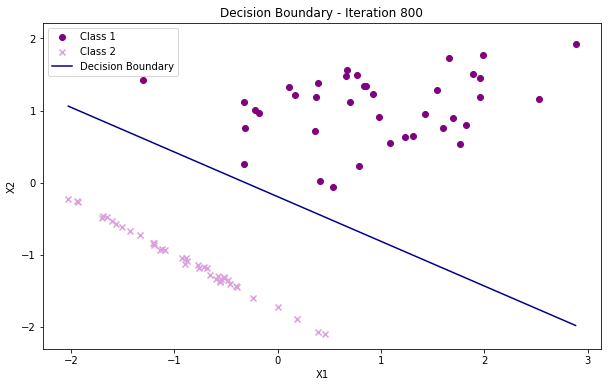

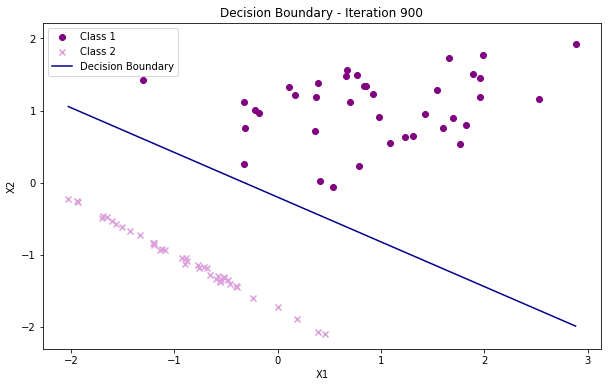

In [233]:
# Train the logistic regression model
theta = logistic_regression(X_train, y_train, theta, learning_rate=.05, num_iterations=1000)

## Predict the result on test data

In [234]:
# Predictions on test set
predictions = predict(X_test, theta)

In [235]:
y_test# Calculate accuracy
accuracy = np.mean(predictions == y_test) * 100
print("Accuracy is:", accuracy)

Accuracy is: 100.0
